In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
raw = pd.read_csv("botswana.tsv", sep="\t", index_col=False) 
raw.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [5]:
print(raw.religion.value_counts())

spirit        1841
other         1080
protestant     993
catholic       447
Name: religion, dtype: int64


In [6]:
raw_dna = raw.dropna()

In [7]:
raw_dna.info

<bound method DataFrame.info of       ceb  age  educ    religion  idlnchld  knowmeth  usemeth  evermarr  \
1       2   43    11  protestant       2.0       1.0      1.0         1   
2       0   49     4      spirit       4.0       1.0      0.0         1   
4       3   32    13       other       3.0       1.0      1.0         1   
5       1   30     5      spirit       5.0       1.0      0.0         1   
6       3   42     4       other       3.0       1.0      0.0         1   
...   ...  ...   ...         ...       ...       ...      ...       ...   
4353    9   49     0  protestant       5.0       0.0      0.0         1   
4354    3   31     2  protestant       4.0       1.0      1.0         1   
4355    4   27     6  protestant       4.0       1.0      1.0         1   
4359    1   26     0      spirit       5.0       1.0      0.0         1   
4360    6   36     3  protestant       8.0       1.0      1.0         1   

      agefm  heduc  urban  electric  radio   tv  bicycle  
1      2

In [8]:
raw['nevermarr'] = [1 if raw.loc[i, 'evermarr'] == 0 else 0 for i in range(raw.shape[0])]

In [9]:
del raw['evermarr']

In [10]:
raw.agefm[raw.agefm.isnull()] = 0

In [11]:
#raw['heduc'] = [-1 if ((raw.loc[i, 'heduc'] == NaN) and (raw.loc[i, 'nevermarr'] == 1)) else raw.loc[i, 'heduc'] for i in range(raw.shape[0])]
raw.heduc[raw.heduc.isnull() & raw.nevermarr.values == 1] = -1

In [12]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ceb        4361 non-null   int64  
 1   age        4361 non-null   int64  
 2   educ       4361 non-null   int64  
 3   religion   4361 non-null   object 
 4   idlnchld   4241 non-null   float64
 5   knowmeth   4354 non-null   float64
 6   usemeth    4290 non-null   float64
 7   agefm      4361 non-null   float64
 8   heduc      4238 non-null   float64
 9   urban      4361 non-null   int64  
 10  electric   4358 non-null   float64
 11  radio      4359 non-null   float64
 12  tv         4359 non-null   float64
 13  bicycle    4358 non-null   float64
 14  nevermarr  4361 non-null   int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 511.2+ KB


In [13]:
raw.heduc.isnull().value_counts()

False    4238
True      123
Name: heduc, dtype: int64

In [14]:
raw['idlnchld_noans'] = 0
raw.loc[raw.idlnchld.isnull(), 'idlnchld_noans'] = 1

raw['heduc_noans'] = 0
raw.loc[raw.heduc.isnull(), 'heduc_noans'] = 1

raw['usemeth_noans'] = 0
raw.loc[raw.usemeth.isnull(), 'usemeth_noans'] = 1

raw.idlnchld[raw.idlnchld.isnull()] = -1
raw.heduc[raw.heduc.isnull()] = -2
raw.usemeth[raw.usemeth.isnull()] = -1

In [26]:
raw = raw.dropna()
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4348 entries, 0 to 4360
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ceb             4348 non-null   int64  
 1   age             4348 non-null   int64  
 2   educ            4348 non-null   int64  
 3   idlnchld        4348 non-null   float64
 4   knowmeth        4348 non-null   float64
 5   usemeth         4348 non-null   float64
 6   agefm           4348 non-null   float64
 7   heduc           4348 non-null   float64
 8   urban           4348 non-null   int64  
 9   electric        4348 non-null   float64
 10  bicycle         4348 non-null   float64
 11  nevermarr       4348 non-null   int64  
 12  idlnchld_noans  4348 non-null   int64  
 13  heduc_noans     4348 non-null   int64  
 14  usemeth_noans   4348 non-null   int64  
dtypes: float64(7), int64(8)
memory usage: 543.5 KB


In [16]:
raw.shape[0] * raw.shape[1]

78264

In [27]:
m1 = smf.ols('ceb ~ ' + ' + '.join(raw.columns[1:]), data=raw)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Sun, 08 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:08:42   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

In [29]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


In [19]:
del raw['religion']
del raw['radio']
del raw['tv']

In [20]:
m2 = smf.ols('ceb ~ ' + ' + '.join(raw.columns[1:]), data=raw)
fitted2 = m2.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Sun, 08 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:01:02   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

In [21]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted2.resid, fitted2.model.exog)[1])

Breusch-Pagan test: p=0.000000


                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Sun, 08 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:01:02   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

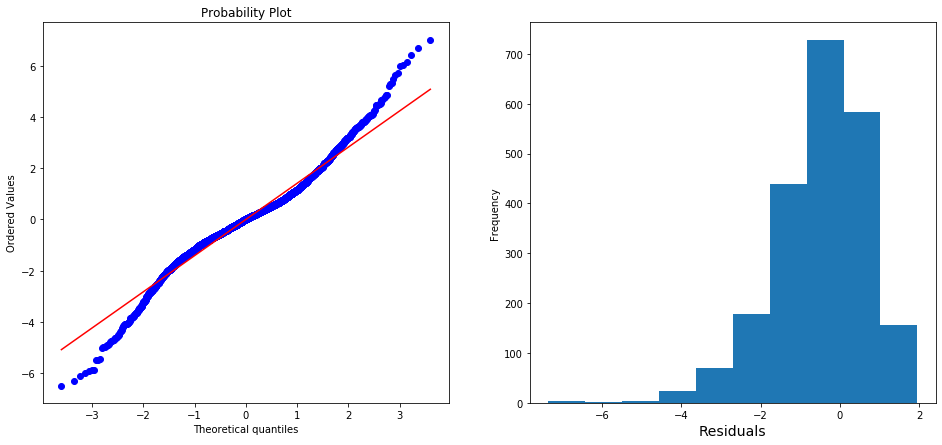

In [22]:
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + bicycle \
+ nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', data = raw)
fitted3 = m3.fit(cov_type='HC1')
print(fitted3.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted3.resid, dist="norm", plot=pylab)
plt.subplot(122)
np.log(fitted3.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

In [23]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted3.resid, fitted3.model.exog)[1])

Breusch-Pagan test: p=0.000000


In [24]:
print('F=%f, p=%f, k1=%f' % m3.fit().compare_f_test(m1.fit()))

F=0.919321, p=nan, k1=-5.000000
